In [1]:
#read data from csv file
import numpy as np
import pandas as pd

In [7]:
movies = pd.read_csv(r'E:\imdb\movie.csv')
ratings = pd.read_csv(r'E:\imdb\rating.csv')
tags = pd.read_csv(r'E:\imdb\tag.csv')

In [8]:
print(movies.shape)
print(ratings.shape)
print(tags.shape)

(27278, 3)
(20000263, 4)
(465564, 4)


In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
del ratings['timestamp']
del tags['timestamp']

In [12]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [14]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [27]:
#series
#data structure
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [16]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [17]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [18]:
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [21]:
row_0['userId']

18

In [22]:
'rating' in row_0

False

In [23]:
row_0.name

0

In [24]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

In [28]:
#data frame
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [30]:
tags.index # find the index (position)

RangeIndex(start=0, stop=465564, step=1)

In [31]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [32]:
tags.iloc[[ 0,11,500]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


In [33]:
#Descriptive Statistics

In [34]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [35]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [36]:
ratings['rating'].mean()

3.5255285642993797

In [37]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [38]:
ratings['rating'].min()

0.5

In [39]:
ratings['rating'].max()

5.0

In [41]:
ratings['rating'].std () # calculates the standard deviation of the column rating in the ratings DataFrame

1.051988919275684

In [42]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [45]:
ratings.corr() # computes the pairwise correlation of all numeric columns in the DataFrame. range(-1 to 1)
                #1: Perfect positive correlation
                #-1: Perfect negative correlation
                 #0: No linear correlation

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [51]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any() 
#filter1.any():
#Checks if any value in the boolean Series is True.
#Returns True if at least one value is True, otherwise False.

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [53]:
filter2 = ratings['rating'] > 0
filter2.all() # to check if all values are True.

True

In [54]:
#Data Cleaning: Handling Missing Data

In [55]:
movies.shape

(27278, 3)

In [58]:
movies.isnull().any().any() # it tells you if there is at least one missing value anywhere in the DataFrame.

False

In [59]:
ratings.shape

(20000263, 3)

In [60]:
ratings.isnull().any().any()

False

In [61]:
tags.shape

(465564, 3)

In [62]:
tags.isnull().any().any() #null value present

True

In [63]:
tags=tags.dropna() #Removes rows (by default) or columns containing any NaN values.

In [64]:
 tags.isnull().any().any()

False

In [65]:
tags.shape

(465548, 3)

In [66]:
#Data Visualization

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

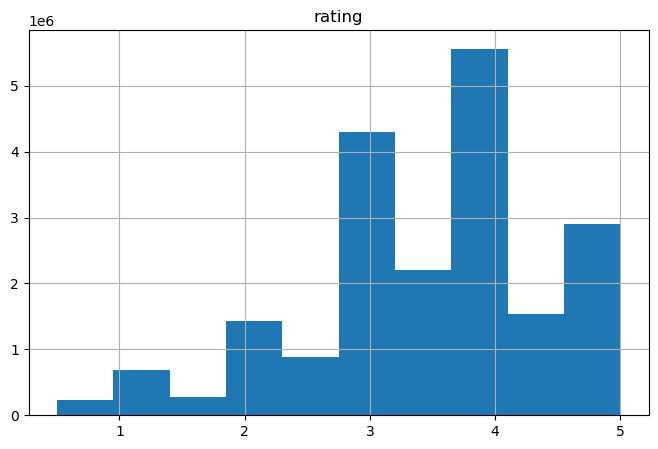

In [70]:
%matplotlib inline

ratings.hist(column='rating', figsize=(8,5))

<Axes: >

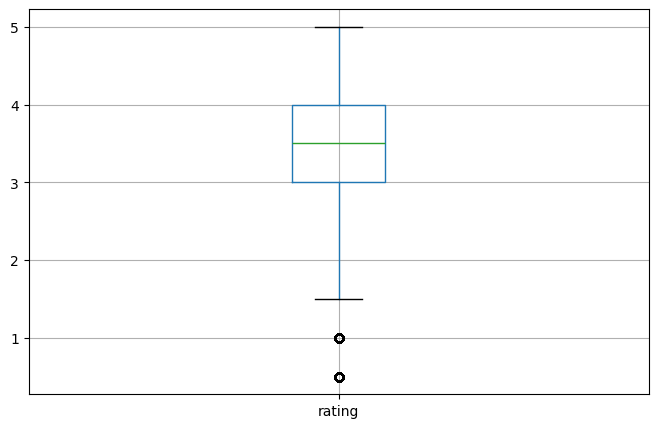

In [74]:
ratings.boxplot(column ='rating', figsize =(8,5))

In [75]:
#Slicing Out Columns

In [76]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [77]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [78]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [79]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

<Axes: xlabel='tag'>

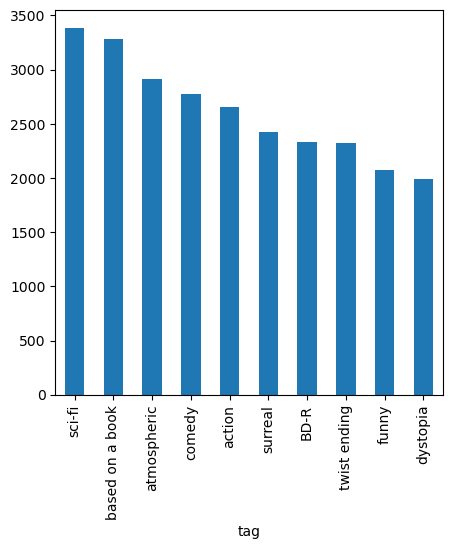

In [81]:
tag_counts[:10].plot(kind='bar', figsize=(5,5))